# Project: TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Given the data collection of about 10,000 movies, each movie contains infomation about its budget, revenue, popularity, etc. The goal is to investigate ways to improve profit in movie industry.

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [222]:
# Importing the packages to be used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [223]:
# Loading the data

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [224]:
# Number of rows and columns

df.shape

(10866, 21)

In [225]:
# Data Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning

In [226]:
# Dropping (id, imdb_id, homepage, tagline,  keywords and overview columns)
# as they will not be useful in our anaysis

df.drop(['tagline', 'keywords', 'overview', 'imdb_id', 'homepage'], axis=1, inplace=True)

In [227]:
# Converting the release date to datetime

df['release_date'] = pd.to_datetime(df['release_date'])

In [228]:
# Duplicated Rows Number

df.duplicated().sum()

1

In [229]:
# Dropping the duplicated rows

df = df.drop_duplicates()

In [230]:
# Null Values within the data

df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [231]:
# Function to replace the null values with "No Value"

def fill_nan (column):
    df[column].fillna("No Value", inplace = True)

In [232]:
# Call the fill_nan function to replace the null values

for point_data in df:
    fill_nan(point_data)

In [233]:
# Adding a column for profit to include in our analysis

df['profit']=df['revenue']-df['budget']

In [234]:
# The updated data info after the data cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10865 non-null object
director                10865 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
profit                  10865 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(7), object(5)
memory usage: 1.5+ MB


In [235]:
# Data overview

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,2.520261e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,9.659103e+07
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,9.092453e+06
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


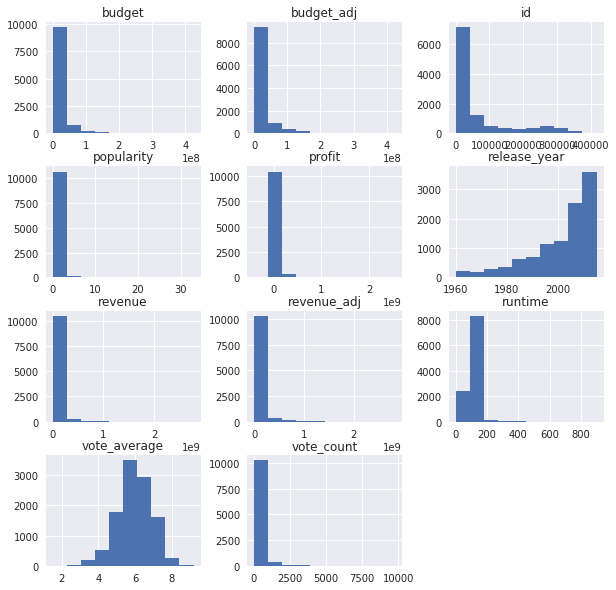

In [236]:
# Histogram view for the data

df.hist(figsize=(10,10));

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Most popular genre of movies

In [237]:
# Since there are movies that have more than one genre, we are going to split the genres for each movie

df_genre=df.copy()

split_genre=df_genre['genres'].str.split('|').apply(pd.Series,1).stack().reset_index(level=1,drop=True)
split_genre.name='genres'
df_genre=df_genre.drop(['genres'],axis=1).join(split_genre)

df_genre.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,genres
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Action
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Adventure
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Science Fiction
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Thriller
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,Action


In [238]:
# Checking the all the genres that are assigned to the movies in the dataset

df_genre['genres'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'No Value', 'Foreign'], dtype=object)

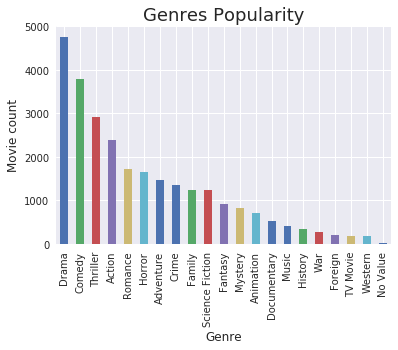

In [239]:
# A view of the occurance frequency of each genre

x=df_genre['genres'].value_counts().plot(kind='bar');
plt.title('Genres Popularity',size=18)
plt.xlabel('Genre',size=12)
plt.ylabel('Movie count',size=12);

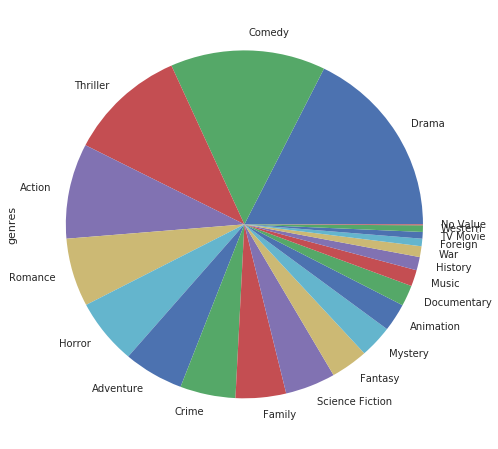

In [240]:
# A pie chart view/

df_genre['genres'].value_counts().plot(kind='pie',figsize=(8,8));

##### Drama, Comedy, Thriller, action are the most popular genres as they take upto 50% of all the movies

### Research Question 2:  What are the most genres the public vote to?

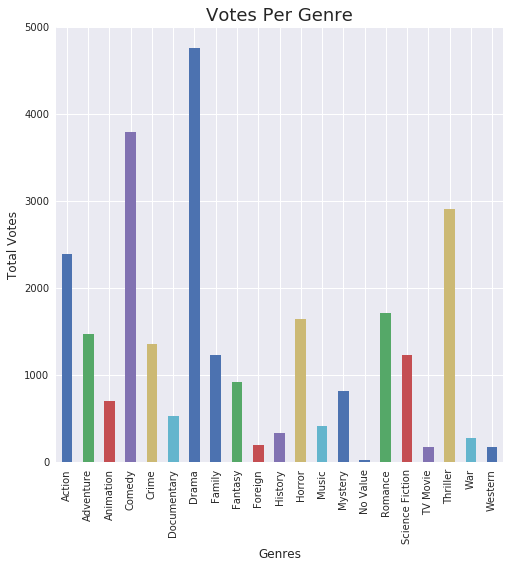

In [241]:
most_voted=df_genre.groupby('genres').count()['vote_count'].plot(kind='bar',figsize=(8,8))
plt.title('Votes Per Genre',size=18)
plt.xlabel('Genres',size=12)
plt.ylabel('Total Votes',size=12);

##### Drama, Comedy, Thriller, action are the most genres that people vote to. Upon analysis, it is noted that the most frequent genres are also the most genres people vote to.

### Research Question 3:  Which years have the highest release of movies?

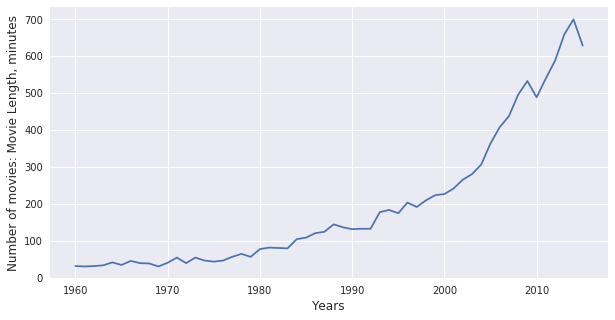

In [242]:
# Grouping the years and comparing them agaist the unique IDs of the movies
movies_release=df.groupby('release_year').count()['id']

# Creating the visual graph
sns.set(rc={'figure.figsize':(10,5)})
plt.plot(movies_release)
plt.xlabel('Years',size=12)
plt.ylabel('Number of movies: Movie Length, minutes',size=12);

In [243]:
# Supporting the above digaram with conrete numbers
print(movies_release.tail(10))

release_year
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


In [245]:
# An overview of the number of movies released per year
print(movies_release)

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


##### Upon analysis, it was noted that the releasing of moves increaed significantly in the 2000s
##### It was also noted that in the 2000s, each year released more movies than the previous one, except for 2010 which was less than 2009

### Research Question 4: What properties are associated with high revenues?

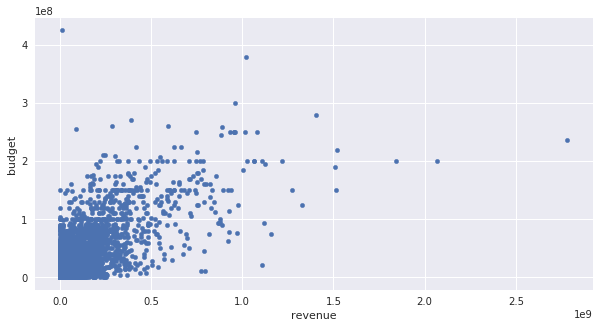

In [246]:
# Comparing between revenue and budget
df.plot(x='revenue',y='budget',kind='scatter');

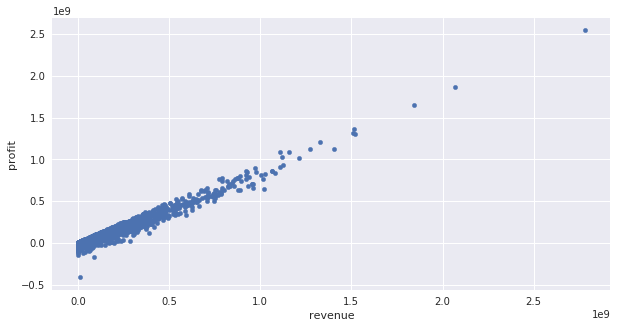

In [247]:
# Comparing between revenue and profit
df.plot(x='revenue',y='profit',kind='scatter');

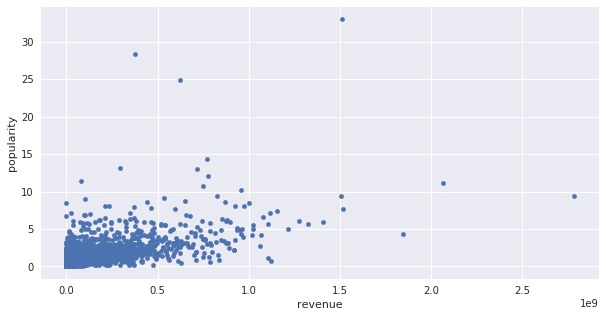

In [248]:
# Comparing between revenue and popularity
df.plot(x='revenue',y='popularity',kind='scatter');

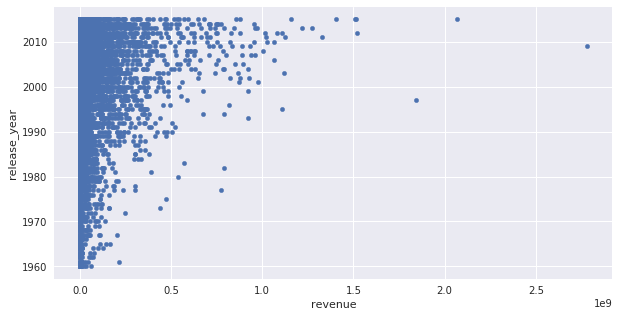

In [249]:
# Comparing between revenue and release year
df.plot(x='revenue',y='release_year',kind='scatter');

- Revenue and budget have a positive correlation. The more the budget gets, the higher the venue is
- Revenue and profit have a strong correlation
- Revenue and popularity have positive correlation.
- Revnue and the release years have a weak positive correlation

### Research Question 5: Which movies have the highest and lowest profit?

In [250]:
# Function to find the minimum and maximum profits of each movie
def find_minmax(x):
    #'idmin' to find the index of lowest profit movie.
    min_index = df[x].idxmin()
    #'idmax' to find the index of Highest profit movie.
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    print("Movie Which Has Highest "+ x + ": ",df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + ": ",df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('profit')

Movie Which Has Highest profit:  Avatar
Movie Which Has Lowest profit:  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


In [251]:
#A plot of the top 10 movies with highest profit.
info = pd.DataFrame(df['profit'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['profit'][:10])

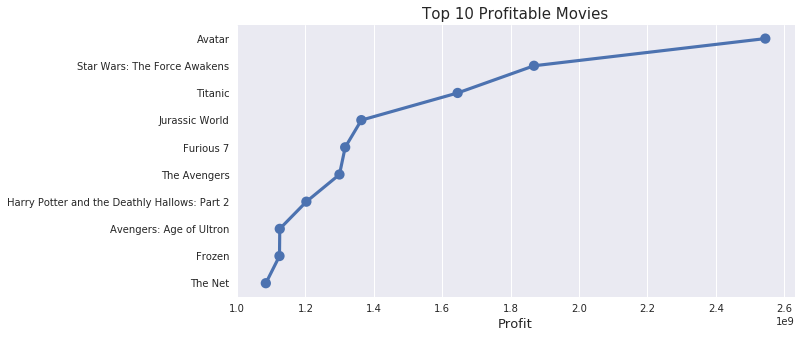

In [252]:
# Setting the plot table
ax = sns.pointplot(x=y,y=x)
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

'Avatar' movie Directed by James Cameron earn the highest profit in all, making over 2.5B in profit.
The most in loss movie is 'The Warrior's Way'. Going in loss by more than 400M was directed by Singmoo Lee.

<a id='conclusions'></a>
## Conclusions

- Drama is the most popular genre
- Western is the least popular genre
- Drama, Comedy, Thriller and action movies make up to 50% of all the movies
- Most of the public vote to Drama movies
- The least amount of public vote to Western movie
- The most popular genre is the most genre the people vote to
- 1961 and 1969 released the least number of movies with 31 movies
- 2014 released the most movies with 700 movies
- Number of movies released incread in general from the year 1960 to 20015
- There is a strong correlation between the revenue and budget of the movie
- Since 1960, 'Avatar' movie made the most profit and 'The Warrior's Way' made the highest loss

In [253]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0